<a href="https://colab.research.google.com/github/kleber293/calculo_numerico/blob/main/primeira_prova_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeira questão

Use os métodos de **Gauss** e o de **Jordan** (os dois métodos devem ser usado) para determinar o vetor solução do seguinte sistema.

$${\begin{cases}\begin{array}{l}8,7x_1&+&3x_2&+&9,3x_3&+&11x_4&=&&16,4\\24,5x_1&-&8,8x_2&+&11,5x_3&-&45,1x_4&=&-&49,7\\52,3x_1&-&84x_2&-&23,5x_3&+&11,4x_4&=&-&80,8\\21x_1&-&81x_2&-&13,2x_3&+&21,4x_4&=&-&106,30\\\end{array}\end{cases}}$$

## Metodo de Gauss

In [1]:
# DEFINDO UMA MATRIZ COM O NOME GAUSS QUE RECEBE APENAS AS LISTAS
# REFERENTES AS LINHAS DA MATRIZ 
def gauss(hea):
    
# VARIÁVEL

    # IMPORTANDO UMA BIBLIOTECA PARA CÁLCULOS NUMÉRICOS
    import numpy as np
    
    # TRANSFORMANDO AS LISTAS DE ENTRADA EM UMA ARRAY PARA QUE SEJA
    # TRATADACOMO UMA MATRIZ 
    arr = np.array(hea, dtype=np.float64, copy=True)
    
    # DEFININDO UMA FUNÇÃO PARA QUE ORGANIZE A MATRIZ DE UMA FORMA
    # A QUAL TENHA A MAIOR DIAGONAL POSSIVEL EM VALORES ABSOLUTOS
    # QUE RECEBE A MATRIZ ARRAY MODIFICADA NA LINHA 10
    def max_diagonal(arr):
        
        # DEFININDO UMA FUNÇÃO PARA PERMUTAR DE FORMA DINÂMICA AS
        # LINHAS DAS MATRIZES E RECEBE COMO PARÂMETRO A MATRIZ arr,
        # A LINHA QUE QUER MODIFICAR shift (INICIAL) E A LINHA A
        # QUAL ELA DEVE IR end (FINAL)
        def permutation(arr, shift, end):

            # A LINHA INICIALS É INSERIDA NA LINHA FINAL
            arr = np.insert(arr, end, arr[shift], axis=0)
            
            # CONDIÇÃO: E GRAVADO NA VARIÁVEL finale O NÚMERO DA
            # LINHA INICIAL MAIS UM, SE A LINHA INICIAL ESTIVER A
            # CIMA DA LINHA FINAL. CASO CONTRÁRIO, finale RECEBE
            # APENA O NÚMERO DA LINHA INCIAL 
            finale = shift + 1 if shift > end else shift 
            
            # REMOVE A LINHA finale, OU SEJA A LINHA EM QUE ELA SE
            # ENCONTRAVA
            arr = np.delete(arr, finale, axis=0)
            
            # FINAL DA FUNÇÃO permutation, RETORNANDO A MATRIZ MODIFICADA.
            return arr 

        # LOOP DO TIPO for: RODANDO A FUNÇÃO PERMUTAÇÃO DE ACORDO COM
        # O NÚMERO DE LINHAS DA MATRIZ arr
        for i in range(len(arr)):
            
            # A MATRIZ err RECEBE A MATRIZ MODIFICADA PELA MERMUTAÇÃO
            # AO PONTO DE SE OBTER A MAIOR DIAGONAL POSSÍVEL ABSOLUTA
            # AO FINAL DO LOOP, RECEBENDO COMO PARÂMETRO A MATRIZ, A
            # LINHA EM QUE O VALOR DO MAIOR NÚMERO ABSOLUTO SE ENTRA,
            # E A LINHA EM QUE ELA DEVE IR.
            # A COLUNA E A LINHA EM QUE ELA DEVE IR É ODIFICADA A CADA
            # LOOP PELA VARIÁVEL i QUE PERCORRE A MATRIZ NO LOOP for
            arr = permutation(
                arr,
                np.where(
                    arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                    i
            )

        # FINAL DA FUNÇÃO max_diagonal, RETORNANDO A MATRIZ MODIFICADA
        # COM A MAIOR DIAGONAL POSSÍVEL EM VALORES ABSOLUTOS 
        return arr

    # AQUI A MATRIZ arr É PASSA PELA FUNÇÃO max_diagonal, E É TRANSFORMADA
    # A PONTO DE SAIR COM A MAIOR DIAGONAL POSSIVEL EM TERMOS ABSOLUTOS
    arr = max_diagonal(arr)

    # NOTA: A ideia desse bloco abaixo é percorrer e modificar cada número
    # da matriz separadametente e de forma dinâmica. Podendo receber
    # matrizes de qualquer tamanho, até mesmo uma matriz 1000 x 1000 ou
    # superiores

    # INTERAÇÕES COM A MATRIZ: cm É UMA VARIÁVEL QUE PERCORRE AS COLUNAS
    # DA LISTA POR MEIO DO LOOP for
    for cm in range(len(arr[0])-2): # coluna da linha da matriz
        
        # l, k SÃO VARIAVEIS QUE PERCORREM cm E AS LINHAS DA MATRIZ A
        # CADA NOVA INTERAÇÃO
        for l, k in zip(range(cm, len(arr)-1), range(len(arr))): # linha
            
            # c RECEBE O VALOR DE CADA LINHA A CADA NOVA INTERAÇÃO, ASSIM
            # COMO cm RECEBE O VALOR DE CADA COLUNA. 
            for c in range(len(arr[0])): # coluna da linha
                
                # CONDIÇÃO: SE c FOR 0 (FALSO), TRATE DA NEGAÇÃO DE c,
                # OU SEJA, (VERDADEIRO),  
                if not c:

                    # DEFININDO A VARIÁVEL v1 COMO O VALOR DO NÚMERO QUE
                    # SE ENCOTRA NA LINHA QUE RECEBE O NÚMERO DA COLUNA
                    # E A COLUNA QUE RECEBE O NÚMERO DA COLUNA.
                    # DEFININDO A VARIÁVEL v2 COMO O DO VALOR NÚMERO QUE
                    # SE ENCONTRA NA LINHA QUE RECEBE COLUNA MAIS O VALOR
                    #  DA # LINHA DA MATRIZ MAIS UM E A COLUNA RECEBE
                    # O VALOR DA COLUNA 
                    v1, v2 = arr[cm][cm], arr[cm+k+1][cm]
                
                # FORA DA CONDIÇÃO: O VALOR DO NÚMERO QUE SE ENCONTRA
                # NA LINHA cm+k+1 E COLUNA c RECEBE v1 VEZES O SEU VALOR
                # MENOS V2 VEZES O VALOR DO NÚMERO QUE SE ENCONTRA NA
                # LINHA COM O VALOR DA COLUNA ATUAL E COLUNA c 
                arr[cm+k+1][c] = v1*arr[cm+k+1][c]-v2*arr[cm][c]
        
        # A MATRIZ PASSA NOVAMENTE POR UMA TRANSFORMAÇÃO A PONTO DE SE
        # OBTER A MAIOR DIAGONAL EM VALORES ABSOLUTOS
        arr = max_diagonal(arr)


    # A FUNÇÃO gauss TERMINA RETORNANDO UMA MATRIZ TRIANGULAR SUPERIOR.
    return arr

# ----

# SEM OS COMENTÁRIOS A FUNÇÃO gauss TERIAS ESSA CARA:

# def gauss(hea):
#     import numpy as np
#     
#     arr = np.array(hea, dtype=np.float64, copy=True)
#     
#     def max_diagonal(arr):
#         
#         def permutation(arr, shift, end):
#             arr = np.insert(arr, end, arr[shift], axis=0)
#             finale = shift + 1 if shift > end else shift 
#             arr = np.delete(arr, finale, axis=0)
#             return arr 
# 
#         for i in range(len(arr)):
#             arr = permutation(
#                 arr,
#                 np.where(arr[i:, i] == max(arr[i:, i], key=abs)
#                         )[0][0]+i,
#                 i
#             )
#         return arr
# 
#     arr = max_diagonal(arr)
# 
#     for cm in range(len(arr[0])-2):
#         for l, k in zip(range(cm, len(arr)-1), range(len(arr))):
#             for c in range(len(arr[0])):
#                 if not c:
#                     v1, v2 = arr[cm][cm], arr[cm+k+1][cm]
#                 arr[cm+k+1][c] = v1*arr[cm+k+1][c]-v2*arr[cm][c]
#         arr = max_diagonal(arr)
# 
#     return arr

In [2]:
# RODANDO A FUNÇÃO PARA O PROBLEMA PROPOSTO E RETORNANDO A MATRIZ
# TRIANGULAR SUPERIOR, ESSA MATRIZ SERÁ GRAVADA NA VARIÁVEL matriztt.

matriztt = gauss(
                [[8.7 ,  3  ,  9.3 ,  11  ,  16.4 ],
                [24.5, -8.8,  11.5,  45.1, -49.7 ],
                [52.3, -84 , -23.5,  11.4, -80.8 ],
                [21  , -81 , -13.2,  21.5, -106.3]]
)

matriztt

array([[ 5.23000000e+01, -8.40000000e+01, -2.35000000e+01,
         1.14000000e+01, -8.08000000e+01],
       [ 0.00000000e+00, -2.47230000e+03, -1.96860000e+02,
         8.85050000e+02, -3.86269000e+03],
       [-0.00000000e+00,  0.00000000e+00, -2.59585653e+06,
        -6.55507228e+06,  7.70376061e+06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.95523939e+12,  1.29265655e+13]])

In [3]:
# PARA VIZUALIZAR O VETOR SOLUÇÃO, PRECISAREMOS DE OUTRA FUNÇÃO APENAS
# PARA TRATAR DA MATRIZ TRIANGULAR SUPERIOR.

# FUNÇÃO DENOMINADA DE RESULTADO, SERÁ ESTE FUNÇÃO QUE VAI ME POSSIBILITAR
# VER O VETOR RESULTADOS
def resultado(hea):
    
    # IMPORTANDO O PACOTE PARA CÁLCULO NUMÉRICO.
    import numpy as np
    
    # TRANSFORMANDO A LISTA hea EM UMA MATRIZ DO TIPO ARRAY, E AO FINAL
    # CRIANDO UMA VARIÁVEL mt DO TIPO LISTA
    arr = np.array(hea, dtype=np.float64, copy=True); mt = []
    
    # RODANDO UM LOOP REVERSO FAZENDO A VARIÁVEL x PERCORRER O NÚMERO
    # DE LINHAS DA MATRIZ arr
    for x in reversed(range(len(arr))):
        
        # DEFINDO A VARIÁVEL s E n COMO LISTAS VAZIAS 
        n = 0; s = []

        # RODANDO UM LOOP E FAZENDO AS VÁRIAVEIS i E k PERCORRER O
        # NÚMERO DE LINHAS DA MATRIX, AO QUAL, SE DIFEREM APENAS
        # PELO VALOR DE x QUE SERÁ SOMANDO AO INÍCIO DE i
        for i, k in zip(range(x+1, len(arr)), range(1, len(arr))):
            
            # FAZENCO A VARIÁVEL RECEBER UM NÚMERO PERTENCENTE A MATRIZ
            # NA POSIÇÃO DA LINHA x E COLUNA i  
            s.append(arr[x][i])
            
            # A CADA LOOP n É SOMADO A AO NÚMERO PERTENCENTE A LISTA s
            # NA POSIÇÃO k-1 VEZES O NÚMERO PERTENCENTE A LISTA mt NA
            # POSIÇÃO k-1 
            n += s[k-1]*mt[k-1]

        # mt RECEBE INÍCIO DA LISTA A SEGUINTE OPERAÇÃO
        # arr[x][len(arr)]-n)/arr.diagonal()[x] 
        mt.insert(0, (arr[x][len(arr)]-n)/arr.diagonal()[x])

    # AO FINAL DA FUNÇÃO resultado É RETORNADO A LISTA mt, ESTE
    # SERÁ O VETOR RESULTADO
    return mt

# NOTA: Por mais complexo que este programa pareça, ele é bem simples.
# estou apenas varrendo a lista de baixo para cima, efetuando as
# operações e salvando as variáveis encontradas.

# ----

# SEM OS COMENTÁRIOS ESSA FUNÇÃO TERIA ESSA CARA:

# def resultado(hea):
#
#     import numpy as np
#     
#     arr = np.array(hea, dtype=np.float64, copy=True); mt = []
#     for x in reversed(range(len(arr))):
#         n = 0; s = []
#         for i, k in zip(range(x+1, len(arr)), range(1, len(arr))):
#             s.append(arr[x][i])
#             n += s[k-1]*mt[k-1]
# 
#         mt.insert(0, (arr[x][len(arr)]-n)/arr.diagonal()[x])
#
#    return mt

In [4]:
# PARA VIZUALIXAR O VETOR SOLUÇÃO DA MATRIZ, IMPRIMIMOS NA TELA
# A SAIDA DA FUNÇÃO resultados. A ORDEM DOS RESULTADOS ESTÁ DE
# ACORDO COM A ORDEM DAS VARIÁVEIS.

print(resultado(matriztt))

[1.1966876152646817, 0.34029642180022973, 3.619705025817075, -2.6086662053002003]


## Metodo de Jordan

In [5]:
# CRIANDO A FUNÇÃO E A DENOMINANDO DE jordan
def jordan(hea):

    # IMPORTANDO A BIBLIOTECA PARA EFETUAR CÁLCULO NUMÉRICO
    import numpy as np

    # CRIANDO UMA FUNÇÃO QUE SERÁ USADA AO FINAL PARA SIMPLIFICAR
    # OS RESULTADOS, ELA APENAS DIVIDE A DIAGONAL PRINCIPAL PELO
    # RESULTADO NA ÚLTIMA LINHA A CADA LINHA.
    def simple(arr):
        
        # EXTRAINDO A DIAGONAL, SE UTILIZANDO DE UMA FUNÇÃO INTERNA
        # DO PYTHON DENOMINADA diagonal
        diag = arr.diagonal()
        
        # RODANDO UM LOOP FOR, A INTENÇÃO É FAZER i E x CONTAR O NÚMERO
        # A QUANTIDADE DE TERMOS NA LISTA diag E PERCORRER A LISTA diag
        # SIMULTANEAMENTE
        for i, x in zip(range(len(diag)), diag):
        
            # DIVIDINDO TODA A LINHA DA MATRIZ arr PELO VALOR DA DIAGONAL
            # PRINCIPAL DAQUELA LINHA     
            arr[i] = arr[i]/x
        
        # AO FINAL DA FUNÇÃO simple, SERÁ RETORNADO A NOVA MATRIZ
        # SIMPLIFICADA
        return arr

    # A LISTA hea SERÁ TRANSFORMADA EM UMA MATRIZ DO TIPO arr
    arr = np.array(hea, dtype=np.float64,  copy=True)

    # RODANDO UM LOOP APENAS DUAS VEZES
    for _ in range(2):

        # DEFINDDO A VARIÁVEL bl COMO UMA LISTA VAZIA
        bl = []

        # RODANDO O LOOP E FAZENDO AS VARIÁVEIS i E k VARREREM
        # A LISTA DE ACORDO COM O NÚMERO DE LINHAS E ARMAZENDO
        # A POSSIÇÃO ATUAL EM k  
        for i, k in zip(arr, range(len(arr))):
            
            # CONDIÇÃO: SE O LOOP NÃO ESTIVER NA PRIMERIA LINHA DA
            # MATRIZ, REALIZE O QUE SE PEDE ABAIXO
            if not k-1 < 0:
                
                # FAZENDO A VARIÁVEL bl RECEBER UMA LISTA CRIADA A
                # PARTIR DO LOOP AO QUAL ESTÁ INSERIDA 
                bl.append([i[x] for x in range(k)])
        
        # ORDENANDO EM APENAS UMA LINHA A MATRIZ/LISTA bl
        bl = np.hstack(bl)

        # CONDIÇÃO: SE O PRIMEIRO TERMO DA PRIMEIRA LINHA FOR O, RODE
        # A FUNÇÃO gauss E CONTINUE NO LOOP
        if len(np.where(bl > 0)[0]) != 0:
            
            # RODANDO A FUNÇÃO gauss E ATUALIZANDO arr
            arr = gauss(arr)
        
        # CASO CONTRÁRIO
        else:

            # PARE DE RODAR O LOOP
            break

    # NOTA: Percorrendo a matriz termo a termo e os trasformando de
    # acordo com o método de gauss

    # CRIANDO UM LOOP E ARMAZENANDO NA VARIÁVEL cm OS NÚMEROS DAS
    # COLUNAS A CADA LOOP DE FORMA REVERSA 
    for cm in reversed(range(1, len(arr[0])-1)):
        
        # CRIANDO UM LOOP E VAZENDO AS VARIÁVEIS l E k RECEBER AS
        # LINHAS DE FORMA REVERSA
        for l, k in zip(reversed(range(cm)), range(1, len(arr))):
            
            # CRIANDO UM LOOP E FAZENDO c PERCORRER AS COLUNAS DE
            # CADA LINHA
            for c in range(len(arr[0])):

                # CONDIÇÃO: SE NÃO FOR A PRIMEIRA VEZ QUE O LOOP ACIMA
                # RODA, ENTÃO RODA O CÓDIGO ABAIXO
                if not c:

                    # DEFINIDO AS VARIAVEIS v1 E v2 COMO VALORES A SEREM
                    # CALCULADOS A CADA NOVA INTERAÇÃO
                    v1, v2 = arr[cm][cm], arr[cm-k][cm]

                # EFETUANDO A OPENAÇÃO DE ESCALONAMENTO PARA CADA TERMO,
                # POR ISSO DOS LOOP ACIMA
                arr[cm-k][c] = v1*arr[cm-k][c]-v2*arr[cm][c]
            
            # AO FINAL DO TERCEIRO LOOP, SIMPLIFIQUE A MATRIZ COM A FUNÇÃO
            # simple
            simple(arr)

    # AO FINAL DA FUNÇÃO jordan A MATRIZ MODIFICADA É RETORNADA.
    return arr

# ---

# SEM COMENTÁRIOS A FUNÇÃO TERIA ESSA CARA

# def jordan(hea):
# 
#     import numpy as np
# 
#     def simple(arr):
#         diag = arr.diagonal()
#         for i, x in zip(range(len(diag)), diag):
#             arr[i] = arr[i]/x
#         return arr
# 
#     arr = np.array(hea, dtype=np.float64,  copy=True)
# 
#     for _ in range(2): 
#         bl = []
#         for i, k in zip(arr, range(len(arr))):
#             if not k-1 < 0:
#                 bl.append([i[x] for x in range(k)])
#         bl = np.hstack(bl)
# 
#         if len(np.where(bl > 0)[0]) != 0:
#             arr = eliminacao_gauss(arr)
#         else:
#             break
# 
#     for cm in reversed(range(1, len(arr[0])-1)):
#         for l, k in zip(reversed(range(cm)), range(1, len(arr))):
#             for c in range(len(arr[0])):
#                 if not c:
#                     v1, v2 = arr[cm][cm], arr[cm-k][cm]
# 
#                 arr[cm-k][c] = v1*arr[cm-k][c]-v2*arr[cm][c]
#             simple(arr)
#     return arr

In [6]:
# RODANDO A FUNÇÃO JORDAN PARA O PROBREMA PROPOSTO,
# O VETOR RESULTADO ESTÁ NA ÚLTIMA COLUNA DA MATRIZ,
# POR SIMPLICIDADE PREFIRO O DEIXAR ASSIM.

jordan(
        [[8.7 ,  3  ,  9.3 ,  11  ,  16.4 ],
        [24.5, -8.8,  11.5,  45.1, -49.7 ],
        [52.3, -84 , -23.5,  11.4, -80.8 ],
        [21  , -81 , -13.2,  21.5, -106.3]]
)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.19668762],
       [-0.        ,  1.        ,  0.        ,  0.        ,  0.34029642],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  3.61970503],
       [-0.        , -0.        , -0.        ,  1.        , -2.60866621]])

# Segunda questão

Considerando $x^{(0)} = [1\:3\:1\:3]^T$ e $\epsilon < 10^{−2}$, use os métodos de Jacobi e o de Gauss-Seidel (os dois métodos devem ser usados) para obter a solução do sistema abaixo.

$${\begin{cases}\begin{array}{l}&5x_1&-&x_2&+&2x_3&+&x_4&=&-&5\\&x_1&+&9x_2&-&3x_3&-&4x_4&=&-&26\\&&-&3x_2&-&7x_3&+&2x_4&=&-&7\\-&2x_1&+&2x_2&-&3x_3&+&10x_4&=&&33\\\end{array}\end{cases}}$$

## Método de Jacobi

In [7]:
# COMO JACOBI É UM MÉTODO ABERTO OU INTERATIVO, ISSO SE REFLETE EM MAIS
# PARAMETROS PARA FUNÇÃO DENOMINADA DE jacobi
def jacobi(hea, ci=[0, 0, 0], ni=100, tc=1e-2, trc=True, permu=True):

    # IMPORTANDO O PACOTE NUMPY (PYTHON NUMÉRICO)
    import numpy as np

    # CRIANDO UMA FUNÇÃO PARA TRUNCAR O RESULTADO FINAL, ESTÁ FUNÇÃO
    # ME RETORNA VERDADEIRO SE O ERRO RELÁTIVO FOR ATINGIDO
    def trunc(arr1, arr2, tr):
        comp = True
        for i in range(len(arr1)):
            comp *= abs((arr2[i]-arr1[i])/arr1[i]) < tc
        return comp

    # CRIANDO UMA FUNÇÃO DENOMIADA DE v, ESTÁ FUNÇÃO SERÁ CRUCIAL PARA
    # O FUNCIONAMENTO DO MÉTODO
    def v(arr, cond, line=0):
        
        # CRIANDO UMA MATRIZ DENOMINADA DE max_diagonal, ESTÁ FUNÇÃO JÁ
        # FOI ABRODADA NOS METODOS DIRETOS NA QUESTÃO UM
        def max_diagonal(arr):
            def permutation(arr, shift, end):
                arr = np.insert(arr, end, arr[shift], axis=0)
                finale = shift + 1 if shift > end else shift 
                arr = np.delete(arr, finale, axis=0)
                return arr 
            for i in range(len(arr)):
                arr = permutation(
                    arr,
                    np.where(arr[i:, i] == max(arr[i:, i], key=abs)
                    )[0][0] + i,
                    i)
            return arr

        # SE O PARÂMETRO permu FOR DEFINIDO COMO True, RODE O CÓDIGO
        # ABAIXO
        if permu:

            # arr É ATUALIZADO A PONTO DE SE OBTER A MAIOR DIAGONAL
            # POSSÍVEL
            arr = max_diagonal(arr)

        # DEFINDO AS VARIÁVEIS n E rs
        n, rs = [arr[line][-1]], 0

        # n RECEBE UMA LISTA DE TERMOS CRIADAS A PARTIR DAD MATRIZ
        # PRINCIPAL
        n.append(
            [x*i for x, i, c in zip(arr[line], cond, range(len(arr[0])))
            if c != line]
        )
        
        # RODANDO UM LOOP E FAZENDO k VARRER A LISTA n[1]
        for k in n[1]:
            rs += k
        x = (n[0]-rs)/arr[line][line]

        return x

    # TRANSFORMANDO A LISTA hea EM UMA MATRIZ DO TIPO ARRAY
    ci = [ci]; arr = np.array(hea, dtype=np.float64, copy=True)

    # RODANDO UM LOOP E FAZENDO j VARRER A QUANTIDADE DEFINIDA EM ni
    for j in range(ni):
        ci.append([])
        for i in range(len(arr)):
            ci[j+1].append(v(arr, ci[j], line=i))
        
        # SE TRC FOR DEFINIDO COMO True, RODE O CÓDIGO ABAIXO.
        if trc:
            
            # SE O ERRO DEFIDIDO FOR ATINGIDO, PARE O LOOP 
            if trunc(ci[j], ci[j+1], tr=tc):
                break
    
    # AO FINAL DA FUNÇÃO jacobi É RETORNADO UMA LISTA DE LISTA CONTENDO
    # O HISTÓRICO DE INTERAÇÕES E AO FINAL O RESULTADO ESPERADO  
    return ci

In [8]:
# IMPORTANDO A BIBLIOTECA NUMPY (PYTHON NUMÉRICO)
import numpy as np

# IMPRIMINDO A MATRIZ MODIFICADA PELO MÉTODO DE JACOBI
print(np.array(jacobi(
    [[5 , -1,  2, -1,  5],
     [1 ,  9, -3,  4, 26],
     [0 ,  3, -7,  2, -7],
     [-2,  2, -3, 10, 33]],
     ci = [1, 3, 1, 3],
     tc = 0.01
)))

[[1.         3.         1.         3.        ]
 [1.8        1.77777778 3.14285714 3.2       ]
 [0.7384127  2.31428571 2.67619048 4.24730159]
 [1.24184127 1.81121693 3.20535147 3.78768254]
 [0.8376393  2.13594255 2.85843084 4.14773031]
 [1.11336224 1.90519244 3.10046975 3.8978686 ]
 [0.92042431 2.06628585 2.93018779 4.07177489]
 [1.05553703 1.95367106 3.04891533 3.94988403]
 [0.96114489 2.03240809 2.96582589 4.03504779]
 [1.02716082 1.97734907 3.02390284 3.97549513]
 [0.9810077  2.0158408  2.98329106 4.0171332 ]
 [1.01327837 1.98892585 3.01168411 3.9880207 ]
 [0.99071566 2.00774346 2.99183128 4.00837574]
 [1.00649133 1.99458614 3.0057117  3.99414382]
 [0.99546131 2.00378538 2.99600658 4.00409455]
 [1.00317335 1.99735336 3.00279218 3.99713716]]


## Método de Gauss-Seidel

In [9]:
# A FUNÇÃO DE GAUSS-SEIDEL É BASTANTE SIMILAR A DE JACOBI, POR ISSO SE
# UTILIZA DA MESMA FUNÇÃO, SALVO APENAS AO FINAL QUE MUDA A FORMA COM
# OS TERMOS VÃO SE RELACIONAR
def gauss_saidel(hea, ci=[0, 0, 0], ni=100, tc=1e-2, trc=True,permu=True):
    
    import numpy as np

    def trunc(arr1, arr2, tr):
        comp = True
        for i in range(len(arr1)):
            comp *= abs((arr2[i]-arr1[i])/arr1[i]) < tc
        return comp

    def v(arr, cond, line=0):
        '''
            Retorna uma matriz solução
        '''
        
        def max_diagonal(arr):
                
            def permutation(arr, shift, end):
                arr = np.insert(arr, end, arr[shift], axis=0)
                finale = shift + 1 if shift > end else shift 
                arr = np.delete(arr, finale, axis=0)
                return arr 

            for i in range(len(arr)):
                arr = permutation(
                    arr,
                    np.where(arr[i:, i] == max(arr[i:, i], key=abs)
                    )[0][0] + i,
                    i
                )
            return arr
        if permu:
            arr = max_diagonal(arr)

        n, rs = [arr[line][-1]], 0
        n.append(
            [x*i for x, i, c in zip(arr[line], cond, range(len(arr[0])))
            if c != line]
        )
        for k in n[1]:
            rs += k
        x = (n[0]-rs)/arr[line][line]

        return x

    # AQUI OS VALORES SERÃO ARMAZENADOS EM UMA LISTA E SERÃO USADOS
    # NA MESMA INTERAÇÃO
    arr = np.array(hea, dtype=np.float64, copy=True)
    
    # PARA ISSO A VARIÁVEL hist FOI CRIADA E SERÁ RESPOSAVEL POR
    # ARMAZENAR OS VALORES, ENQUANTO arr SERÁ MODIFICADA 
    hist = np.array([ci], dtype=np.float64, copy=True)

    for j in range(1, ni+1):
        for i in range(len(arr)):
            ci[i] = v(arr, ci, line=i)
        
        hist = np.append(hist, [ci], axis=0)

        # O TRUNCAMENTO IRÁ FUNCIONAR DA MESMA FORMA, MAS AGORA SERÁ
        # APLICADO A VARIÁVEL hist
        if trc:
            if trunc(hist[j-1], hist[j], tr=tc):
                break
    
    # AO FINAL DO PROGRAMA, hist É RETORNADA PARA QUE OS SEUS VALORES
    # SEJAM ANALIZADOS
    return hist

In [10]:
# IMPRIMINDO A MATRIZ MODIFICADA PELO MÉTODO DE SAIDEL

print(gauss_saidel(
    [[5 , -1,  2, -1,  5],
     [1 ,  9, -3,  4, 26],
     [0 ,  3, -7,  2, -7],
     [-2,  2, -3, 10, 33]],
     ci = [1, 3, 1, 3],
     tc = 0.01

))

[[1.         3.         1.         3.        ]
 [1.8        1.68888889 2.58095238 4.09650794]
 [1.12469841 1.80356966 2.94338927 4.04724253]
 [0.99280673 1.96093233 2.99675458 4.00540125]
 [0.99456489 1.99712154 3.00030959 3.99958155]
 [0.99921678 2.0003762  3.00004167 3.99978062]]


# Terceira questão

Seja o diagrama de um circuito.

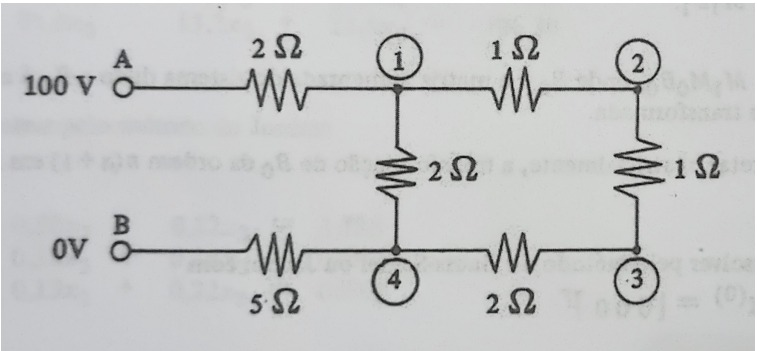

A corrente que flui do nó $p$ para o nó $q$ de uma rede elétrica é $I_{pq} =
\frac{V_p − V_q}{R_{pq}}$, onde $I$ é dado em ampères e $R$ em ohms. $V_p$ e $V_q$ são voltagens nos nós $p$ e $q$, respectivamente, e $R_{pq}$ é a resistência no arco $pq$ (LEI DE OHM).


A soma das correntes que chegam a cada nó é nula (LEI DE KIRCHOFF), assim,
as equações que relacionam as voltagens podem ser obtidas.


No nó $1$, temos a equação $I_A + I_{21} + I_{41} = 0$, ou seja,

$$ \frac{100 − V1}{2} + \frac{V2 − V1}{1} + \frac{V4 − V1}{2} = 0 $$


ou

$$ −4V_1 + 2V_2 + V_4 = −100. $$


a) Obtenha as equações dos nós 2, 3 e 4;


b) Resolva, por qualquer método, o sistema linear formado pelas equações dos
nós $1, 2, 3$ e $4$, a fim de obter as voltagens em cada nó do circuito.

## Item a)

Equações:

Nó 1 $\qquad\frac{100-V_1}{2}+\frac{V_2-V_1}{1}+\frac{V_4-V_1}{2}=0$


Nó 2 $\qquad\frac{V_1-V_2}{1}+\frac{V_3-V_2}{1}=0$


Nó 3 $\qquad\frac{V_2-V_3}{1}+\frac{V_4-V_3}{2}=0$


Nó 4 $\qquad\frac{0-V_4}{5}+\frac{V_3-V_4}{2}+\frac{V_1-V_4}{2}=0$

\\
Após a analise do problema, as seguintes equações foram descorbertas. utilizaremos do método de Seidel para a solução deste sistema.

\\

$\begin{array}{l}
&-&4V_1&+&2V_2&&&+&V_4&=&-&100\\
&&V_1&-&2V_2&+&V_3&&&=&&0\\
&&&&2V_2&-&3V_3&+&V_4&=&&0\\
&&5V_1&&&+&5V_3&-&12V_4&=&&0
\end{array}$

In [11]:
# SE UTILIZANDO NO METODO DE GAUSS-SEIDEL, OS VELORES DE V1, V2, V3, V4
# ESTÃO RETORNADOS NA ÚLTIMA COLUNA DA MATRIZ.

jordan(
    [[-4,  2,  0,   1, -100],
     [ 1, -2,  1,   0,    0],
     [ 0,  2, -3,   1,    0],
     [ 5,  0,  5, -12,    0]]
)

array([[ 1.,  0.,  0.,  0., 76.],
       [ 0.,  1.,  0.,  0., 72.],
       [-0., -0.,  1., -0., 68.],
       [-0., -0.,  0.,  1., 60.]])

# Quarta questão

Utilize um método diferente em cada item para determinar os zeros das funções
abaixo.


a) $f(x) = \sin x − \ln x$, com $\epsilon ≤ 10^{−3}$;


b) $f(x) = 0,2x^3 − 3,006x^2 + 15,06x − 25,15$, com $\epsilon ≤ 10^{−4}$;


c) $f(x) = x^5 − 9x^4 + 7x^3 + 185x^2 − 729x + 1040$, com $\epsilon ≤ 10^{−2}$;


d) $f(x) = x^3 − e^{2x} + 3$, com $\epsilon ≤ 10^{−3}$.

## Item a)

$f(x) = \sin x − \ln x$, com $\epsilon ≤ 10^{−3}$;

In [12]:
# CRIANDO UMA FUNÇÃO DENOMINADA DE BISSECÇÃO
def bisseccao(a, b, n=100, e=0.001):
    
    # RODANDO UM LOOP E FAZENDO l VARRER DE 0 À 99 
    for l in range(n):

        # CONDIÇÃO: SE O LOOP RODAR PELA PRIMEIRA VEZ xi RECEBE A,
        # CASO CONTRÁRIO DEVERÁ RECEBER x
        xi = a if l == 0 else x
        
        # A CADA NOVA INTERAÇÃO A MEDIA DOS INTERVALOS É RETIRADA
        x = (a+b)/2

        # CONDIÇÃO: SE F(a) ou f(b) for um raiz do problema, a raiz
        # recebe a ou b e para o loop.
        # O LOOP TAMBÉM DEVE PARAR SE O ERRO RELATIVO FOR ALCANÇADO
        if f(a) == 0 or f(b) == 0 or abs((xi-x)/x) < e:
            raiz = a if f(a) == 0 else raiz
            raiz = b if f(b) == 0 else raiz
            break

        # CASO CONTRÁRIO, OS INTERVALOS SERÃO ANALIZADOS PELO TEÓREMA
        # DE BOLZANO E a OU b ASSUME O VALOR DE x
        else:
            a = x if f(x) * f(a) > 0 else a 
            b = x if f(x) * f(b) > 0 else b
            raiz = x

    # A FUNÇÃO SE ENCERRA, RETORNANDO A RAIZ, O NÚMERO DE LOOP E O
    # ERRO RELÁTIVO
    return (raiz, l, abs((xi-x)/x))

# ---

# SEM OS COMENTÁRIOS, A FUNÇÃO TERIA ESSA CARA.

# def bisseccao(a, b, n=100, e=0.001):
#      
#     for l in range(n):
#         xi = a if l == 0 else x
#         x = (a+b)/2
#         if f(a) == 0 or f(b) == 0 or abs((xi-x)/x) < e:
#             raiz = a if f(a) == 0 else raiz
#             raiz = b if f(b) == 0 else raiz
#             break
# 
#         else:
#             a = x if f(x) * f(a) > 0 else a 
#             b = x if f(x) * f(b) > 0 else b
#             raiz = x
# 
#     return (raiz, l, abs((xi-x)/x))

In [13]:
# IMPORTANDO O NUMPY (PYTHON NUMÉRICO)
import numpy as np

# DEFINDO UMA FUNÇÃO f COM A FUNÇÃO DO PROBLEMA
f = lambda x: np.sin(x)-np.log(x)

# RETORNANDO APENAS A RAIZ ENCONTRADA
bisseccao(1, 3, e=1e-3)[0]

2.22265625

## Item b)

$f(x) = 0,2x^3 − 3,006x^2 + 15,06x − 25,15$, com $\epsilon ≤ 10^{−4}$;



In [14]:
# CRIANDO A FUNÇÃO PARA O MÉTODO DAS CORDAS, DENOMINADO corda.
# ESTE MÉTODO SEGUE OS MESMOS PASSOS DA FUNÇÃO bisseccao, SALVO APENAS
# EM COMO O x É OBTIDO A CADA NOVA INTERAÇÃO
def corda(a, b, n=100, e=0.001):

    for l in range(n):    
        xi = a if l == 0 else x

        # NESTE PONTO A FUNÇÃO MUDA E x É OBTIDO DE ACORDO COM A FORMULÁ
        # DO MÉTODO DAS CORDAS
        x = a-f(a)*(b-a)/(f(b)-f(a)) 

        if f(a) == 0 or f(b) == 0 or abs((x-xi)/x) < e:
            raiz = a if f(a) == 0 else raiz
            raiz = b if f(b) == 0 else raiz
            break

        else:
            a = x if f(x) * f(a) > 0 else a 
            b = x if f(x) * f(b) > 0 else b
            raiz = x

    return (raiz, l, abs((x-xi)/x))

# ---

# SEM OS COMENTÁRIOS, A FUNÇÃO TERIA ESSA CARA.

# def corda(a, b, n=100, e=0.001):
# 
#     for l in range(n):    
#         xi = a if l == 0 else x
#         x = a-f(a)*(b-a)/(f(b)-f(a)) 
# 
#         if f(a) == 0 or f(b) == 0 or abs((x-xi)/x) < e:
#             raiz = a if f(a) == 0 else raiz
#             raiz = b if f(b) == 0 else raiz
#             break
# 
#         else:
#             a = x if f(x) * f(a) > 0 else a 
#             b = x if f(x) * f(b) > 0 else b
#             raiz = x
# 
#     return (raiz, l, abs((x-xi)/x))

In [15]:
# IMPORTANDO O NUMPY (PYTHON NUMÉRICO)
import numpy as np

# DEFINDO UMA FUNÇÃO f COM A FUNÇÃO DO PROBLEMA
f = lambda x: 0.2*x**3-3.006*x**2+15.06*x-25.15

# APLICANDO A FUNÇÃO corda E OBTENDO APENAS A RAIZ DO PROBLEMA
# QUE SE ENCONTRA NO INTERVALO 4 À 7.
corda(4, 7,n=1000, e=1e-4)[0]

4.887346608889715

## Item c)

$f(x) = x^5 − 9x^4 + 7x^3 + 185x^2 − 729x + 1040$, com $\epsilon ≤ 10^{−2}$;

In [16]:
# CRIANDO A FUNÇÃO newton, ESTÁ FUNÇÃO SE UTILIZA DE APENAS UM
# VALOR INÍCIAL
def newton(a, n=100, e=0.01):
    
    # SE UTILIZANDO DA DERIVAÇÃO NUMÉRICA PARA SE OBTER f'(X)
    df = lambda a, h=e:(f(a + h)-f(a-h))/(2*h)

    # RODANDO UM LOOP E FAZENDO i VARRER DE 0 À 99 COMO FOI DEFINIDO
    # NOS PARÂMETROS DA FUNÇÃO
    for i in range(n):

        # CONDIÇÃO: SE ESTIVER NO PRIMEIRO LOOP, x RECEBE a, CASO
        # CONTRÁRIO, x RECEBE UMA APROXIMAÇÃO DA FUNÇÃO PELA SERIE
        # DE TEYLOR TRUNCADA NO SEGUNDO TERMO
        x = a if i == 0 else x-f(x)/df(x)
        
        # CONDIÇÃO: SE NÃO FOR A PRIMEIRA VEZ QUE O LOOP RODA
        # ERRO SERÁ DEFINIDO COMO O ERRO RELÁTIVO PEGANDO OS VALORES
        # OBTIDOS, CASO CONTRÁRIO, error RECEBE UM VALOR QUALQUER QUE
        # EU DEFINI COMO 1
        error = abs((er-x)/x) if i != 0 else 1; er = x
        
        # SE O ERRO FOR ATINGIDO, O PROGRAMA PARA
        if error <= e:
            break
    # A FUNÇÃO TERMINA, RETORNANDO A RAIZ, O NÚMERO DE LOOPS E O
    # ERRO RELÁTIVO
    return x, i, error

# ---

# SEM OS COMENTÁRIOS, A FUNÇÃO TERIA ESSA CARA.

# def newton(a, n=100, e=0.01):
#     
#     df = lambda a, h=e:(f(a + h)-f(a-h))/(2*h)
# 
#     for i in range(n):
#         x = a if i == 0 else x-f(x)/df(x)
#         error = abs((er-x)/x) if i != 0 else 1; er = x
#         if error <= e:
#             break
#     
#     return x, i, error

In [17]:
# IMPORTANDO O NUMPY (PYTHON NUMÉRICO)
import numpy as np

# DEFINDO UMA FUNÇÃO f COM A FUNÇÃO DO PROBLEMA
f = lambda x: x**5-9*x**4+7*x**3+185*x**2-729*x+1040

# RODANDO A FUNÇÃO newton E DEFINDO O ERRO COMO FOI SOLICITADO.
newton(0, e=1e-2)

(-4.941959034344222, 47, 0.000982841588756246)

## Item d)

$f(x) = x^3 − e^{2x} + 3$, com $\epsilon ≤ 10^{−3}$.

In [18]:
# CRIANDO UMA FUNÇÃO DENOMINADA DE in_linear.
def in_linear(a, n=100, e=0.1):

    # RODANDO UM LOOP E FAZENDO l VARRER DE 0 Á 99, MAS PODE SER
    # MUDADO PASSANDO UM NOVO PARÂMETRO
    for l in range(n):
        
        # CONDIÇÃO: SE O LOOP ESTIVER RODDANDO NA PRIMEIRA VEZ,
        # RAIZ RECEBE UMA VALOR QUALQUER DEFINIDO COMO a, CASO
        # CONTRÁRIO, RAIZ RECEBE g(raiz) ONDE g É A FUNÇÃO PASSADA
        raiz = a if l == 0 else g(raiz)
        
        # SE O LOOP ESTIVER RODANDO PELA PRIMEIRA VEZ O ERRO VAI
        # RECEBER UM VALOR QUALQUER DEFINIDO COMO INÍCIALMENTE COMO 1,
        # CASO CONTRÁRIO, ELE DEVE RECEBER O ERRO RELÁTIVO A PARTIR DOS
        # PONTOS OBTIDOS
        error = 1 if l == 0 else abs((r2-raiz)/raiz)
        
        # SE O ERRO RELÁTIVO FOR ALCANÇADO, O PROGRAMA DEVE PARAR
        if error < e:
            break

        # DEFINDO r2 COMO A RAIZ E ELA SERÁ USADA PARA SE OBTER O ERRO
        # RELÁTIVO
        r2 = raiz

    # O PROGRAMA TERMINA RETORNANDO A RAIZ, O NÚMERO DE LOOPS E O ERRO
    # RELÁTIVO.
    return raiz, l, error

# ---

# SEM OS COMENTÁRIOS, A FUNÇÃO TERIA ESSA CARA.

# def in_linear(a, n=100, e=0.1):
#     for l in range(n):
#         raiz = a if l == 0 else g(raiz)
#         error = 1 if l == 0 else abs((r2-raiz)/raiz)
#         if error < e:
#             break
#         r2 = raiz
#     return raiz, l, error

In [19]:
# IMPORTANDO O NUMPY (PYTHON NUMÉRICO)
import numpy as np

# DEFINDO UMA FUNÇÃO f COM A FUNÇÃO DO PROBLEMA
f = lambda x: x**3-np.exp(2*x)+3
# DEFININDO UMA FUNÇÃO g COMO ALTERNATIVA A f, ELA FOI OBTIDA APENAS
# ISSOLANDO O x DA EXPONENCIAL
g = lambda x: np.log(x**3+3)/2

# RETORNANDO APENAS A RAIZ DO PROBLEMA AO APLICAR A FUNÇÃO in_linear
in_linear(0, e=1e-3)[0]

0.5809446691035433

# Quinta questão

Determine o comprimento $L$ de um cabo suspenso em dois pontos do mesmo nível
e distantes $(2x)\:400m$, com flecha $f$ de $100m$, sabendo que


$$L = 2a\cdot senh\left(\frac{x}{a}\right)$$


Sendo $a$ a raiz da equação

$$a\left(cosh\left(\frac{x}{a}\right)-1\right)-f=0$$

Como:

$x=200m$

e 

$f=100m$

In [20]:
# IMPORTANDO O PACOTE NUMPY (PYTHON NUMÉRICO)
import numpy as np

# DEFININDO A FUNÇÃO f(x) COMO A FUNÇÃO DO PROBLEMA
f = lambda a: a*(np.cosh(200/a)-1)-100

# ENCONTRANDO A RAIZ PELO MÉTODO DE NEWTON, QUE JÁ FOI COMENTADO.
newton(100, e=1e-5)

(214.86403765166057, 6, 1.0096260336646527e-06)

Assim $L$ será

In [23]:
2*newton(100, e=1e-5)[0]*np.sinh(200/newton(100, e=1e-5)[0])

460.3164456346076

In [21]:
#@title

%%html

<table style="white-space: nowrap; width: 0px;" border="0" cellspacing="0">
  <tbody>
    <tr>
      <td style="vertical-align: 0px;">
        <img style="border-right: 3px solid #ff6b00; padding-right: 13px; height: 90px;" src="https://i.pinimg.com/280x280_RS/79/42/c4/7942c414d01e7c8f8c179f905a5a86eb.jpg"/></td>
        <td style="white-space: nowrap; font-family: Helvetica, Arial; padding-left: 11px; font-size: 12px; vertical-align: middle; width: 560px;">
        <h1 style="white-space: nowrap; font-size: 14px; color: #ff6b00; line-height: 1; margin: 0 0 8px 0;">
          <b>CLEBSON DOS SANTOS MARQUES</b>
        </h1>

        <span style="color: #808080; data-contrast: none;">
          Estudante do Curso de Licenciatura em F&iacute;sica pela Universidade Estadual Vale do Acara&uacute;<br />
        </span>
        <span style="white-space: nowrap; font-size: 12px; color: #ff6b00; line-height: 1px; margin: 0 0 8px 0;" data-contrast="none">
          <b>Tel.:</b>
        </span>
        <span style="color: #808080; data-contrast: none;">(88) 9 9412 2413
          <br /><a style="color: #808080; data-contrast: none; text-decoration: none;" href="mailto:klebersantosy@gmail.com">klebersantosy@gmail.com</a><br />
          <a style="color: #808080; data-contrast: none; text-decoration: none;" href="http://lattes.cnpq.br/9411163467458250">http://lattes.cnpq.br/9411163467458250</a>
        </span>

        <div style="white-space: nowrap; margin-top: 8px;">
          <a style="white-space: nowrap; display: inline-block;" href="https://api.whatsapp.com/send?phone=558894122413">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://icon-library.com/images/icon-whatsapp-png/icon-whatsapp-png-2.jpg" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://t.me/clebson_marques">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://www.freepnglogos.com/uploads/telegram-png/telegram-communications-icons-24.png" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://www.passeidireto.com/perfil/371127-klebson-marques/">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://img.utdstc.com/icon/f63/09d/f6309d71c42e9f12c4aaf4800260f4c2ae9637ab4b148c381e8378e80ccce0e6:200" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://github.com/kleber293">
            <img style="white-space: nowrap; width: 26px; height: 20px; object-fit: cover;" src="http://pngimg.com/uploads/github/github_PNG69.png" /></a>
        </div>
      </td>
    </tr>
  </tbody>
</table>

,CLEBSON DOS SANTOS MARQUES Estudante do Curso de Licenciatura em Física pela Universidade Estadual Vale do Acaraú Tel.: (88) 9 9412 2413 klebersantosy@gmail.com http://lattes.cnpq.br/9411163467458250


# NOTA

Todas as funções listadas aqui, foram criadas por mim.